# A simplified salt advection model

Salinity conservation in the model for a two-vessel system kept at fixed temperature difference ($\Delta_{\rho T}$)
$$
\begin{aligned}
V \frac{d\Delta S}{dt} &= -M\Delta S +FS_0 \\
M &= k |\Delta_\rho| \\
\Delta_\rho &= \Delta_{\rho T} - \beta\Delta S
\end{aligned}
$$

where,

$$
\begin{aligned}
V &:= \text{volume} \\
\Delta S &:= \text{salinity difference between two boxes} \\
M &:= \text{volume exchange} \\
F &:= \text{fresh water flux (in terms of volume per unit time)} \\
S_0 &:= \text{constant mean salinity}
\end{aligned}
$$

Combining the equations,

$$V \frac{d\Delta S}{dt} = -k|\Delta_{\rho T} - \beta\Delta S|\Delta S +FS_0$$

Similar to Stommel (1961) we can transform the variable $\Delta S$ to a normalized one given by

$$R=\frac{\beta \Delta S}{\Delta_{\rho T}}$$

with which we can have two kinds of solutions:
* salinity dominated solution $R>1$
* thermally dominated solution $R < 1$

Substituting $R$ instead of the $\Delta S$, we get

$$\frac{V\Delta_{\rho T}}{\beta} \frac{d R}{dt} =  - \frac{k\Delta_{\rho T}^2}{\beta} |1-R| R + FS_0 $$

rearranging the terms,

$$ \frac{d R}{dt} =  - \frac{k\Delta_{\rho T}}{V} |1-R| R  + \frac{FS_0\beta}{\Delta_{\rho T} V}$$

## Steady state solutions

At steady state, $\frac{d R}{dt} \to 0$ and therefore,

$$\frac{k\Delta_{\rho T}}{V} |1-R| R  = \frac{FS_0\beta}{\Delta_{\rho T} V}$$

$$|1-R| R  = \frac{FS_0\beta}{k\Delta_{\rho T}^2} = F^*$$
where, $F^*$ is a normalized flux of fresh water which we will use from now on.

### Salinity dominated solution (R>1)

$$(R-1)R = F^*$$ 

$$R^2 - R - F^* = 0$$

$$R = \frac{1}{2} \pm \sqrt{\frac{1}{4} + F^*}$$

However, since we have the constraint $R > 1$ there can be **only one solution** for a given $F^*$

$$R = \frac{1}{2} + \sqrt{\frac{1}{4} + F^*}$$

Substituting this solution to arrive at an expression for $M$,

$$
\begin{aligned}
M &= k|\Delta_{\rho T} - \beta\Delta S| \\
  &= k\Delta_{\rho T} |1 - R| \\
  &= k\Delta_{\rho T} (R - 1) && \because R>1 \\
  &= k\Delta_{\rho T} \left(-\frac{1}{2} + \sqrt{\frac{1}{4} + F^*} \right)
\end{aligned}
$$

### Thermally dominated solution (R<1)

$$(1-R)R = F^*$$ 

$$R^2 - R + F^* = 0$$

$$R = \frac{1}{2} \pm \sqrt{\frac{1}{4} - F^*}$$

In this case, we have the constraint $R < 1$ there can be **multiple solutions** for a given $F^*$

Substituting this solution to arrive at an expression for $M$,

$$
\begin{aligned}
M &= k|\Delta_{\rho T} - \beta\Delta S| \\
  &= k\Delta_{\rho T} |1 - R| \\
  &= k\Delta_{\rho T} (1 - R) && \because R<1 \\
  &= k\Delta_{\rho T} \left(\frac{1}{2} \mp \sqrt{\frac{1}{4} - F^*} \right)
\end{aligned}
$$

## Stability

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd

def plot(data, **kwargs):
    df = pd.DataFrame.from_dict(data)
    df.set_index(df.columns[0], inplace=True)
    sns.lineplot(data=df, **kwargs)

To evaluate how stable these steady-state solutions are, we need to know the derivative at the neighbourhood of the solutions. We use the expression for the rate of change of normalized salinity difference

$$ \frac{d R}{dt} =  - \frac{k\Delta_{\rho T}}{V} |1-R| R  + \frac{FS_0\beta}{\Delta_{\rho T} V}$$

which can be written as

$$ \frac{d R}{dt} =  \frac{k\Delta_{\rho T}}{V}( -|1-R| R  + F^*)$$

absorbing the constant coefficient into the time variable,

$$ R' = \frac{d R}{dt^*} =   -|1-R| R  + F^*$$

For $F^*$ we to pick a nominal value, say $F^*=0.1$

### Multiple steady state solutions

Text(0.5, 1.0, '$F^* = 0.1$')

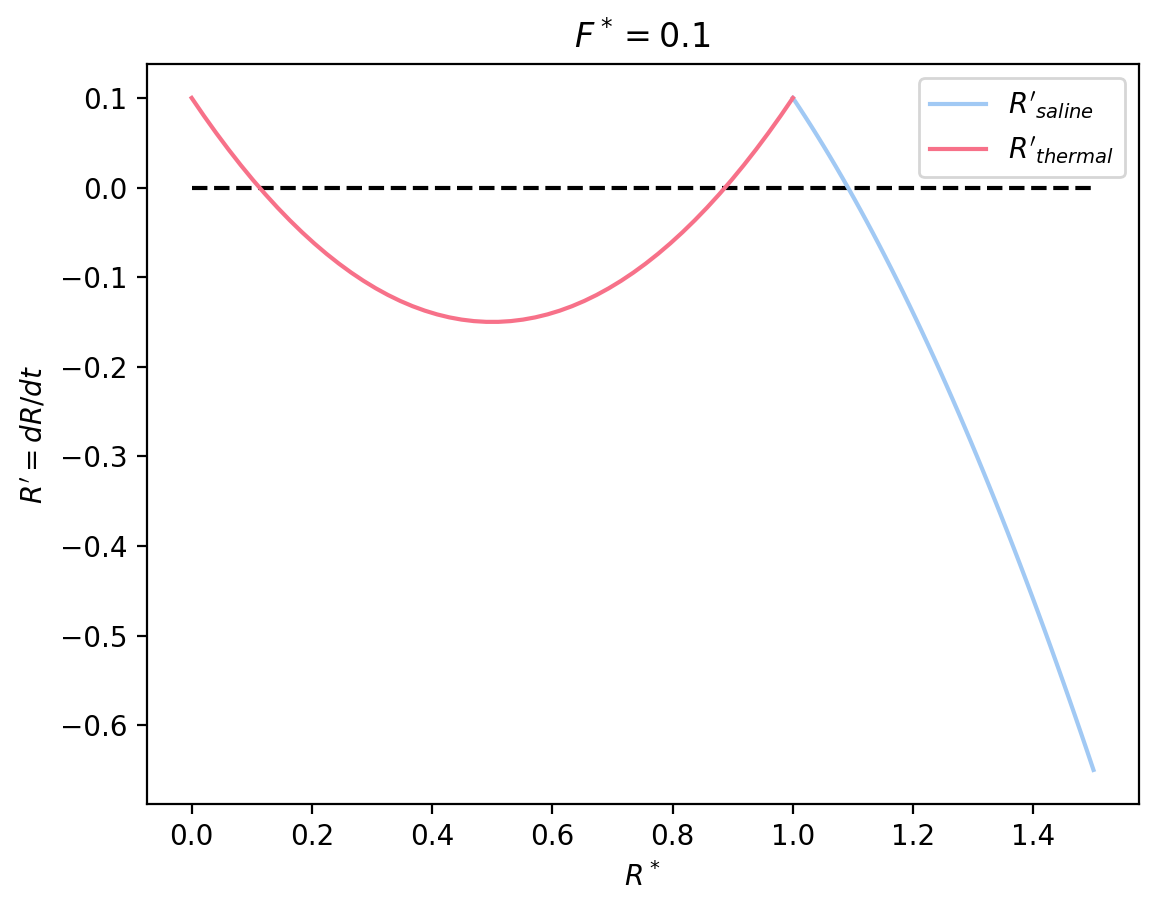

In [2]:
def Rprime(R):
    Fstar = 0.1
    return -np.abs(1-R) * R + Fstar

fig, ax = plt.subplots()

sns.set_palette("pastel")
data = {}
data["$R^*$"] = R = np.linspace(1, 1.5, endpoint=True)
data["$R'_{saline}$"] = Rprime(R)
plot(data, ax=ax)

ax.hlines(0, 0, 1.5, "k", "--")
sns.set_palette("husl")

data = {}
data["$R^*$"] = R = np.linspace(0, 1, endpoint=True)
data["$R'_{thermal}$"] = Rprime(R)
plot(data, ax=ax, hue=2)
ax.set_ylabel("$R' = dR/dt$")
ax.set_title("$F^* = 0.1$")

The steady-state solutions are represented by the values of $R*$ where the curves $R'$ cross the dashed zero line. The lower value (at $R^* \approx 0$) for the thermally dominated solution is **stable**, since the **slope is negative**, whereas the higher value is **unstable**. Using similar arguments, the salinity dominated solution is shown to be **stable**.

## Relation with normalized fresh water flux, $F^*$

### Normalized salinity difference

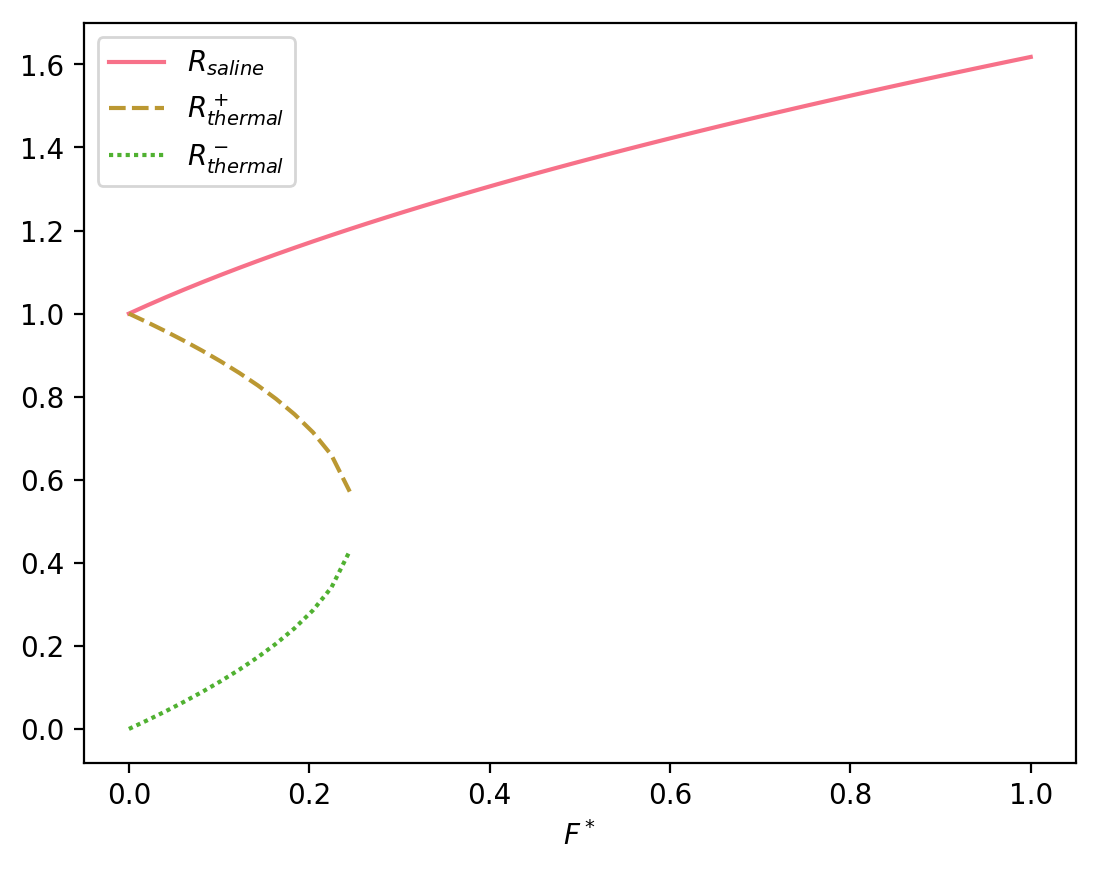

In [3]:
%%capture --no-display
data = {}
data["$F^*$"] = Fs = np.linspace(0, 1, endpoint=True)
data["$R_{saline}$"] = 0.5 + (0.25 + Fs) ** 0.5
data["$R_{thermal}^+$"] = 0.5 + (0.25 - Fs) ** 0.5
data["$R_{thermal}^-$"] = 0.5 - (0.25 - Fs) ** 0.5
plot(data)

### Normalized volume exchange

We can plot a normalized quantity:
$$M* = M / (k\Delta_{\rho T})$$

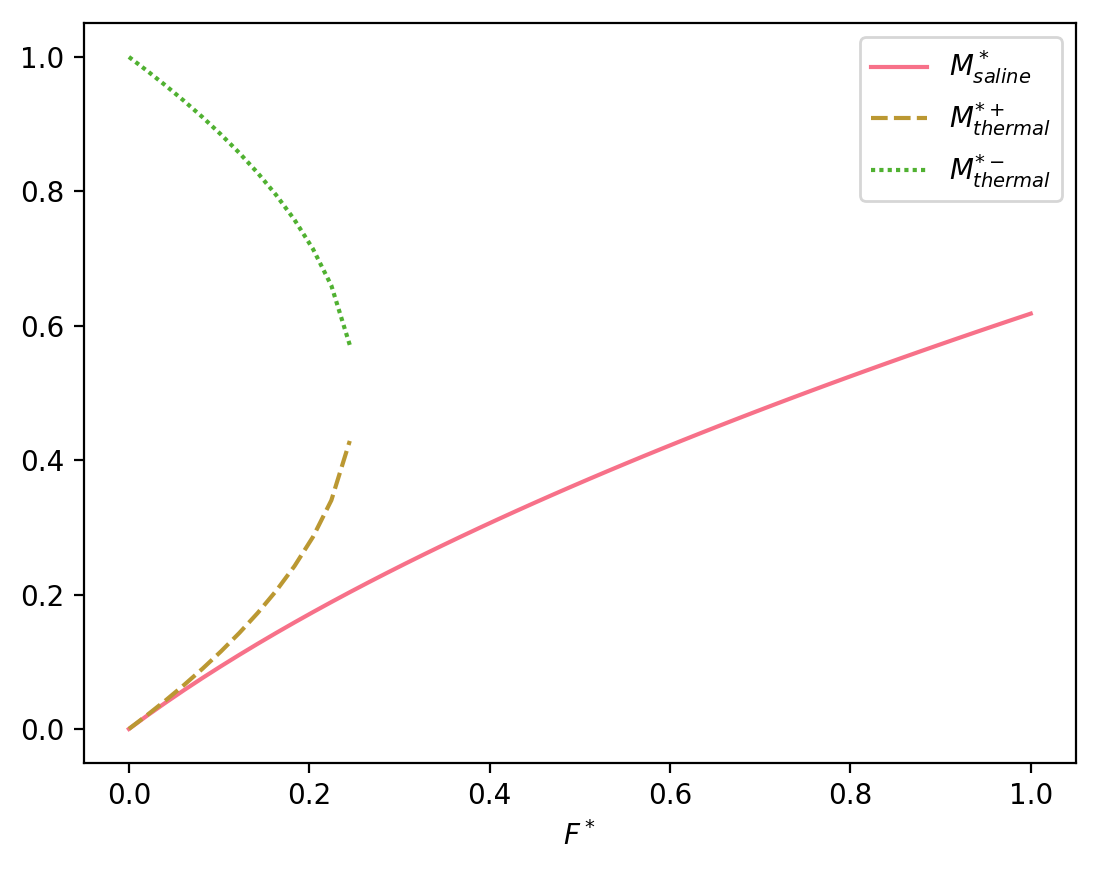

In [4]:
%%capture --no-display
data = {}
data["$F^*$"] = Fs = np.linspace(0, 1, endpoint=True)
data["$M_{saline}^*$"] = 0.5 + (0.25 + Fs) ** 0.5 - 1
data["$M_{thermal}^{*+}$"] = 1 -  (0.5 + (0.25 - Fs) ** 0.5)
data["$M_{thermal}^{*-}$"] = 1 - (0.5 - (0.25 - Fs) ** 0.5)
plot(data)

In general we can infer that low volume exchange ($M_{thermal}^{*+}$ and $M_{saline}^*$) is associated with larger salinity difference  ($R_{thermal}^+$ and $R_{saline}^*$) and vice versa.